In [1]:
import pandas as pd

In [39]:
import numpy as np

In [2]:
import regex as re

In [3]:
titanic_db = pd.read_csv('../Data/train.csv')


In [4]:
titanic_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
change_db=titanic_db.copy(deep=True)


In [7]:
change_db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
change_db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
pattern = (
    r'^(?P<LastName>[^,]+),\s*'
    r'(?P<Title>\w+)\.?\s*'
    r'(?P<HusbandName>[^(]+)?'
    r'(?:\((?P<ActualName>[^)]+)\))?'
)

extract= change_db['Name'].str.extract(pattern)
extract['HusbandName'] = extract['HusbandName'].str.strip()

change_db2=pd.concat([change_db,extract],axis=1)
change_db2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,NaN


In [10]:
change_db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  LastName     891 non-null    object 
 13  Title        891 non-null    object 
 14  HusbandName  875 non-null    object 
 15  ActualName   143 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 111.5+ KB


In [11]:
change_db2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
LastName         0
Title            0
HusbandName     16
ActualName     748
dtype: int64

In [12]:
change_db2.loc[change_db2['HusbandName'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Hewlett,Mrs,NaN,Mary D Kingcome
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,Nye,Mrs,NaN,Elizabeth Ramell
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,Chibnall,Mrs,NaN,Edith Martha Bowerman
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S,Pinsky,Mrs,NaN,Rosa
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S,Parrish,Mrs,NaN,Lutie Davis
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S,Mellinger,Mrs,NaN,Elizabeth Anne Maidment
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,Ball,Mrs,NaN,Ada E Hall
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,Barbara,Mrs,NaN,Catherine David
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Moussa,Mrs,NaN,Mantoura Boulos
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Turkula,Mrs,NaN,Hedwig


In [13]:
change_db2['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
change_db2['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
change_db2.loc[change_db2['Survived']==1, 'Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [16]:
change_db2.loc[((change_db2['Age'].isnull())),'Sex'].value_counts()

Sex
male      124
female     53
Name: count, dtype: int64

In [17]:
change_db2.loc[((change_db2['Age'].isnull())),'Pclass'].value_counts()

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [18]:
change_db2.loc[((change_db2['Age'].isnull())),'Title'].value_counts()

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

In [19]:
change_db2.loc[((change_db2['Age'].isnull())&(change_db2['Title']=='Dr'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,Brewe,Dr,Arthur Jackson,NaN


In [20]:
change_db2.loc[((change_db2['Title']=='Dr'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Minahan,Dr,William Edward,NaN
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Moraweck,Dr,Ernest,NaN
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Pain,Dr,Alfred,NaN
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Stahelin-Maeglin,Dr,Max,NaN
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Frauenthal,Dr,Henry William,NaN
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Brewe,Dr,Arthur Jackson,NaN
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Leader,Dr,Alice,Farnham


There are 7 `Dr.` passengers, where **1** is *female* and 6 are *male* Dr. passengers. 


In [21]:
change_db2.loc[((change_db2['Sex']=='male')&(change_db2['Title']=='Dr'))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,6.000000,6.000000,6.000000,5.000000,6.000000,6.0,6.000000
mean,504.000000,0.333333,1.333333,40.600000,0.666667,0.0,53.041667
std,211.018483,0.516398,0.516398,12.876335,1.032796,0.0,48.757506
min,246.000000,0.000000,1.000000,23.000000,0.000000,0.0,10.500000
25%,338.250000,0.000000,1.000000,32.000000,0.000000,0.0,18.125000
50%,516.000000,0.000000,1.000000,44.000000,0.000000,0.0,35.050000
75%,654.000000,0.750000,1.750000,50.000000,1.500000,0.0,77.400000
max,767.000000,1.000000,2.000000,54.000000,2.000000,0.0,133.650000


In [22]:
change_db_cleaned=change_db2.copy(deep=True)

For final cleaning created a table `change_db_cleaned` by creating a copy of `change_db2`

In [23]:
change_db_cleaned.loc[((change_db2['Age'].isnull())&(change_db2['Title']=='Dr')),'Age']=41

In [24]:
change_db_cleaned.loc[((change_db2['Sex']=='male')&(change_db2['Title']=='Dr'))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000
mean,504.000000,0.333333,1.333333,40.666667,0.666667,0.0,53.041667
std,211.018483,0.516398,0.516398,11.518102,1.032796,0.0,48.757506
min,246.000000,0.000000,1.000000,23.000000,0.000000,0.0,10.500000
25%,338.250000,0.000000,1.000000,34.250000,0.000000,0.0,18.125000
50%,516.000000,0.000000,1.000000,42.500000,0.000000,0.0,35.050000
75%,654.000000,0.750000,1.750000,48.500000,1.500000,0.0,77.400000
max,767.000000,1.000000,2.000000,54.000000,2.000000,0.0,133.650000


`Dr.` title (1 null): Impute with **40.6** rounding it to **41**— mean age of male Dr. passengers.

In [25]:
change_db2.loc[((change_db2['Age'].isnull())&(change_db2['Title']=='Master'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Moubarek,Master,Gerios,NaN
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Master,Thomas Henry,NaN
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Master,Henry Forbes,NaN
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Moubarek,Master,Halim Gonios,"""William George"""


`Master` title of 3rd class has all 4 null values of age

In [26]:
change_db2.loc[((change_db2['Title']=='Master')&(change_db2['Pclass']==3))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,28.000000,28.000000,28.0,24.000000,28.000000,28.000000,28.000000
mean,388.285714,0.392857,3.0,5.350833,2.928571,1.357143,28.177232
std,314.309927,0.497347,0.0,3.593608,1.942289,0.558721,13.898033
min,8.000000,0.000000,3.0,0.420000,0.000000,0.000000,8.516700
25%,151.500000,0.000000,3.0,2.000000,1.000000,1.000000,15.900000
50%,270.500000,0.000000,3.0,4.000000,3.500000,1.000000,28.512500
75%,761.000000,1.000000,3.0,9.000000,4.000000,2.000000,33.462500
max,870.000000,1.000000,3.0,12.000000,8.000000,2.000000,69.550000


In [27]:
change_db_cleaned.loc[(change_db2['Title']=='Master')&(change_db2['Age'].isnull()),'Age']=5

In [28]:
change_db_cleaned.loc[((change_db2['Title']=='Master')&(change_db2['Pclass']==3))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,28.000000,28.000000,28.0,28.000000,28.000000,28.000000,28.000000
mean,388.285714,0.392857,3.0,5.300714,2.928571,1.357143,28.177232
std,314.309927,0.497347,0.0,3.319105,1.942289,0.558721,13.898033
min,8.000000,0.000000,3.0,0.420000,0.000000,0.000000,8.516700
25%,151.500000,0.000000,3.0,2.750000,1.000000,1.000000,15.900000
50%,270.500000,0.000000,3.0,5.000000,3.500000,1.000000,28.512500
75%,761.000000,1.000000,3.0,8.250000,4.000000,2.000000,33.462500
max,870.000000,1.000000,3.0,12.000000,8.000000,2.000000,69.550000


`Master` in 3rd class (4 nulls): Impute with **5.3** round off to **5** — mean age of Master passengers in 3rd class.


In [ ]:
change_db2.loc[(change_db2['Title']=='Mrs')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs,Nicholas,Adele Achem
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Hewlett,Mrs,NaN,Mary D Kingcome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Beckwith,Mrs,Richard Leonard,Sallie Monypeny
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Abelson,Mrs,Samuel,Hannah Wizosky
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Potter,Mrs,Thomas Jr,Lily Alexenia Wilson
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Shelley,Mrs,William,Imanita Parrish Hall


In [73]:
change_db2.loc[(change_db2['Title']=='Mrs'),'Age'].describe()

count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

In [74]:
change_db2.loc[(change_db2['Title']=='Mrs'),'Age'].median()

np.float64(35.0)

In [83]:
change_db2.loc[((change_db2['Age'].notnull())&(change_db2['Title']=='Mrs')),'Pclass'].value_counts()

Pclass
2    41
1    34
3    33
Name: count, dtype: int64

In [82]:
change_db2.loc[((change_db2['Age'].isnull())&(change_db2['Title']=='Mrs')),'Pclass'].value_counts()

Pclass
3    9
1    8
Name: count, dtype: int64

In [87]:
change_db2.loc[((change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')),'Age'].describe()

count    34.000000
mean     40.882353
std      12.643754
min      17.000000
25%      35.000000
50%      41.500000
75%      50.750000
max      62.000000
Name: Age, dtype: float64

In [88]:
change_db2.loc[((change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')),'Age'].median()

np.float64(41.5)

In [124]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs'),['Pclass','Name','Age','SibSp','Parch','Fare']].sort_values('SibSp')

,Pclass,Name,Age,SibSp,Parch,Fare
194,1,"Brown, Mrs. James Joseph (Margaret Tobin)",44.0,0,0,27.7208
166,1,"Chibnall, Mrs. (Edith Martha Bowerman)",NaN,0,1,55.0000
268,1,"Graham, Mrs. William Thompson (Edith Junkins)",58.0,0,1,153.4625
256,1,"Thorne, Mrs. Gertrude Maybelle",NaN,0,0,79.2000
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,0,1,247.5208
523,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",44.0,0,1,57.9792
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,80.0000
779,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",43.0,0,1,211.3375
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,83.1583
862,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,0,0,25.9292


In [125]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0),['Pclass','Name','Age','SibSp','Parch','Fare']]

,Pclass,Name,Age,SibSp,Parch,Fare
166,1,"Chibnall, Mrs. (Edith Martha Bowerman)",NaN,0,1,55.0000
194,1,"Brown, Mrs. James Joseph (Margaret Tobin)",44.0,0,0,27.7208
256,1,"Thorne, Mrs. Gertrude Maybelle",NaN,0,0,79.2000
268,1,"Graham, Mrs. William Thompson (Edith Junkins)",58.0,0,1,153.4625
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,0,1,247.5208
523,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",44.0,0,1,57.9792
779,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",43.0,0,1,211.3375
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,80.0000
862,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,0,0,25.9292
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,83.1583


In [138]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare']]

,Pclass,Name,Age,SibSp,Parch,Fare
194,1,"Brown, Mrs. James Joseph (Margaret Tobin)",44.0,0,0,27.7208
256,1,"Thorne, Mrs. Gertrude Maybelle",NaN,0,0,79.2000
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,80.0000
862,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,0,0,25.9292


In [117]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,4.0,3.000000,4.0,4.0,4.000000
mean,1.0,51.333333,0.0,0.0,53.212500
std,0.0,9.451631,0.0,0.0,30.480188
min,1.0,44.000000,0.0,0.0,25.929200
25%,1.0,46.000000,0.0,0.0,27.272900
50%,1.0,48.000000,0.0,0.0,53.460400
75%,1.0,55.000000,0.0,0.0,79.400000
max,1.0,62.000000,0.0,0.0,80.000000


In [133]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),['Age']]=57

In [135]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),['Age']].describe()

,Age
count,4.000000
mean,52.750000
std,8.220908
min,44.000000
25%,47.000000
50%,52.500000
75%,58.250000
max,62.000000


`Mrs` title in `1st class` and has 0 -`SibSp` and 0-`Parch` **(1 null)**: Impute with **57**- middle value between mean age of group and max age of group. 

In [139]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==1),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']]

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
166,1,"Chibnall, Mrs. (Edith Martha Bowerman)",NaN,0,1,55.0000,E33
268,1,"Graham, Mrs. William Thompson (Edith Junkins)",58.0,0,1,153.4625,C125
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,0,1,247.5208,B58 B60
523,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",44.0,0,1,57.9792,B18
779,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",43.0,0,1,211.3375,B3
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,83.1583,C50


In [136]:
change_db2[change_db2['Cabin']=='E33']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0,E33,S,Chibnall,Mrs,NaN,Edith Martha Bowerman
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0,E33,S,Bowerman,Miss,Elsie Edith,NaN


In [147]:
change_db2[change_db2['Cabin']=='B58 B60']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Baxter,Mr,Quigg Edmond,NaN
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Baxter,Mrs,James,Helene DeLaudeniere Chaput


In [127]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==1),['Pclass','Name','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,6.0,5.000000,6.0,6.0,6.000000
mean,1.0,50.200000,0.0,1.0,134.743050
std,0.0,6.797058,0.0,0.0,82.278281
min,1.0,43.000000,0.0,1.0,55.000000
25%,1.0,44.000000,0.0,1.0,64.273975
50%,1.0,50.000000,0.0,1.0,118.310400
75%,1.0,56.000000,0.0,1.0,196.868750
max,1.0,58.000000,0.0,1.0,247.520800


In [149]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==1)&(change_db_cleaned['Age'].isnull()),['Age']]=50

In [150]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==1),['Age']].describe()

,Age
count,6.000000
mean,50.166667
std,6.080022
min,43.000000
25%,45.500000
50%,50.000000
75%,54.500000
max,58.000000


`Mrs` title in `1st class` and has 0 -`SibSp` and 1-`Parch` **(1 null)**: Impute with **50.2** round off to 50- mean age of group and comparing with a person from this group who is having a son of same age group as her daughters' age. 

In [152]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1),['Pclass','Name','Age','SibSp','Parch','Fare']].sort_values('Parch')

,Pclass,Name,Age,SibSp,Parch,Fare
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000
31,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,1,0,146.5208
52,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,76.7292
151,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000
230,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,83.4750
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,91.0792
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,108.9000
334,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",NaN,1,0,133.6500
366,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0,1,0,75.2500


In [156]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,Penasco y Castellana,Mrs,Victor de Satode,Maria Josefa Perez de Soto y Vallejo
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S,Dick,Mrs,Albert Adrian,Vera Gillespie
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,Astor,Mrs,John Jacob,Madeleine Talmadge Force
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,Bishop,Mrs,Dickinson H,Helen Walton
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,Pears,Mrs,Thomas,Edith Wearne
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S,Chambers,Mrs,Norman Campbell,Bertha Griggs
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S,Harris,Mrs,Henry Birkhardt,Irene Wallach
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S,Holverson,Mrs,Alexander Oskar,Mary Aline Towner
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S,Hoyt,Mrs,Frederick Maxfield,Jane Anne Forby
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel


In [171]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,23.0,17.000000,23.0,23.0,23.000000
mean,1.0,35.823529,1.0,0.0,84.038043
std,0.0,13.933930,0.0,0.0,40.162538
min,1.0,17.000000,1.0,0.0,51.862500
25%,1.0,22.000000,1.0,0.0,56.450000
50%,1.0,35.000000,1.0,0.0,76.729200
75%,1.0,49.000000,1.0,0.0,89.552100
max,1.0,60.000000,1.0,0.0,227.525000


In [161]:
array=change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),'HusbandName'].unique()

In [177]:
change_db2.loc[(change_db2['HusbandName'].isin(array))&(change_db2['Pclass']==1),['Pclass','Name','Age','Title', 'SibSp','Parch','Fare','HusbandName']].sort_values(['HusbandName','Age'])

,Pclass,Name,Age,Title,SibSp,Parch,Fare,HusbandName
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,Mrs,1,0,57.0000,Albert Adrian
690,1,"Dick, Mr. Albert Adrian",31.0,Mr,1,0,57.0000,Albert Adrian
383,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",35.0,Mrs,1,0,52.0000,Alexander Oskar
35,1,"Holverson, Mr. Alexander Oskar",42.0,Mr,1,0,52.0000,Alexander Oskar
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,Mrs,1,0,91.0792,Dickinson H
484,1,"Bishop, Mr. Dickinson H",25.0,Mr,1,0,91.0792,Dickinson H
34,1,"Meyer, Mr. Edgar Joseph",28.0,Mr,1,0,82.1708,Edgar Joseph
375,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",NaN,Mrs,1,0,82.1708,Edgar Joseph
712,1,"Taylor, Mr. Elmer Zebley",48.0,Mr,1,0,52.0000,Elmer Zebley
669,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",NaN,Mrs,1,0,52.0000,Elmer Zebley


In [178]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].sort_values('Age')

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,108.9000,C65
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,1,0,57.0000,B20
700,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.0,1,0,227.5250,C62 C64
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,91.0792,B49
151,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000,C2
809,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",33.0,1,0,53.1000,E8
230,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,83.4750,C83
383,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",35.0,1,0,52.0000,NaN
486,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",35.0,1,0,90.0000,C93
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123


In [200]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==376,'Age']=22

In [202]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==670,'Age']=42

In [205]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==335,'Age']=44

In [207]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==850,'Age']=43

In [208]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].sort_values('Age')

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,108.9000,C65
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,1,0,57.0000,B20
700,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.0,1,0,227.5250,C62 C64
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,91.0792,B49
151,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000,C2
375,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",22.0,1,0,82.1708,NaN
809,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",33.0,1,0,53.1000,E8
230,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,83.4750,C83
383,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",35.0,1,0,52.0000,NaN
486,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",35.0,1,0,90.0000,C93


In [209]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,23.0,21.000000,23.0,23.0,23.000000
mean,1.0,36.190476,1.0,0.0,84.038043
std,0.0,13.136282,0.0,0.0,40.162538
min,1.0,17.000000,1.0,0.0,51.862500
25%,1.0,22.000000,1.0,0.0,56.450000
50%,1.0,35.000000,1.0,0.0,76.729200
75%,1.0,44.000000,1.0,0.0,89.552100
max,1.0,60.000000,1.0,0.0,227.525000


In [212]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),['Age']]=36

In [ ]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].sort_values('Age')

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,108.9000,C65
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,1,0,57.0000,B20
700,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.0,1,0,227.5250,C62 C64
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,91.0792,B49
151,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000,C2
375,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",22.0,1,0,82.1708,NaN
809,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",33.0,1,0,53.1000,E8
230,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,83.4750,C83
383,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",35.0,1,0,52.0000,NaN
486,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",35.0,1,0,90.0000,C93


In [215]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,23.0,17.000000,23.0,23.0,23.000000
mean,1.0,35.823529,1.0,0.0,84.038043
std,0.0,13.933930,0.0,0.0,40.162538
min,1.0,17.000000,1.0,0.0,51.862500
25%,1.0,22.000000,1.0,0.0,56.450000
50%,1.0,35.000000,1.0,0.0,76.729200
75%,1.0,49.000000,1.0,0.0,89.552100
max,1.0,60.000000,1.0,0.0,227.525000


In [214]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,23.0,23.000000,23.0,23.0,23.000000
mean,1.0,36.173913,1.0,0.0,84.038043
std,0.0,12.525074,0.0,0.0,40.162538
min,1.0,17.000000,1.0,0.0,51.862500
25%,1.0,27.500000,1.0,0.0,56.450000
50%,1.0,36.000000,1.0,0.0,76.729200
75%,1.0,43.500000,1.0,0.0,89.552100
max,1.0,60.000000,1.0,0.0,227.525000


#### Age Imputation – Mrs (`1st Class`, `1 SibSp`, `0 Parch`)
- Group: **23** `Mrs.` passengers in 1st class with 1 SibSp, 0 Parch

- **6** had missing Age values

Imputation Strategy:
- For 4 accompanied by husbands → **imputed as Husband Age - 6** (based on avg age gap)

- For remaining 2 → **used group’s updated mean age after first 4 imputations**

In [226]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,Vander Planke,Mrs,Julius,Emelia Maria Vandemoortele
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,NaN
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Asplund,Mrs,Carl Oscar,Selma Augusta Emilia Johansson
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,Ahlin,Mrs,Johan,Johanna Persdotter Larsson
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs,Josef,Josefine Franchi
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S,Backstrom,Mrs,Karl Alfred,Maria Mathilda Gustafsson
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,Robins,Mrs,Alexander A,Grace Charity Laury
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,Boulos,Mrs,Joseph,Sultana
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,Hakkarainen,Mrs,Pekka Pietari,Elin Matilda Dolck


In [224]:
change_db2.loc[(change_db2['Age'].isnull())&(change_db2['Title']=='Mrs')&(change_db2['Pclass']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,NaN
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,Boulos,Mrs,Joseph,Sultana
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,O'Brien,Mrs,Thomas,"Johanna ""Hannah"" Godfrey"
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,Davison,Mrs,Thomas Henry,Mary E Finck
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Moussa,Mrs,NaN,Mantoura Boulos
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,Meek,Mrs,Thomas,Annie Louise Rowley
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S,Thorneycroft,Mrs,Percival,Florence Kate White
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,Peter,Mrs,Catherine,Catherine Rizk
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,Caram,Mrs,Joseph,Maria Elias


In [90]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')),'Age'].describe()

count    33.000000
mean     33.515152
std      10.031579
min      15.000000
25%      27.000000
50%      31.000000
75%      40.000000
max      63.000000
Name: Age, dtype: float64

In [91]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')),'Age'].median()

np.float64(31.0)

In [250]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch'].isin([0,2])),['Name','Age','Parch','SibSp', 'Fare', 'Cabin']].sort_values(['Parch','Age'])

,Name,Age,Parch,SibSp,Fare,Cabin
797,"Osman, Mrs. Mara",31.0,0,0,8.6833,NaN
483,"Turkula, Mrs. (Hedwig)",63.0,0,0,9.5875,NaN
19,"Masselmani, Mrs. Fatima",NaN,0,0,7.2250,NaN
367,"Moussa, Mrs. (Mantoura Boulos)",NaN,0,0,7.2292,NaN
415,"Meek, Mrs. Thomas (Annie Louise Rowley)",NaN,0,0,8.0500,NaN
394,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",24.0,2,0,16.7000,G6
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,2,0,11.1333,NaN
255,"Touma, Mrs. Darwis (Hanne Youssef Razi)",29.0,2,0,15.2458,NaN
254,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",41.0,2,0,20.2125,NaN
140,"Boulos, Mrs. Joseph (Sultana)",NaN,2,0,15.2458,NaN


In [252]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch'].isin([2])),['Name','Age','Parch','SibSp', 'Fare', 'Cabin','Ticket']].sort_values(['Age'])

,Name,Age,Parch,SibSp,Fare,Cabin,Ticket
394,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",24.0,2,0,16.7000,G6,PP 9549
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,2,0,11.1333,NaN,347742
255,"Touma, Mrs. Darwis (Hanne Youssef Razi)",29.0,2,0,15.2458,NaN,2650
254,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",41.0,2,0,20.2125,NaN,370129
140,"Boulos, Mrs. Joseph (Sultana)",NaN,2,0,15.2458,NaN,2678
533,"Peter, Mrs. Catherine (Catherine Rizk)",NaN,2,0,22.3583,NaN,2668


In [286]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch']==2),['Name','Age','Parch','SibSp', 'Fare', 'Cabin','Ticket']].describe()

,Age,Parch,SibSp,Fare
count,4.000000,6.0,6.0,6.000000
mean,30.250000,2.0,0.0,16.815950
std,7.455423,0.0,0.0,3.987252
min,24.000000,2.0,0.0,11.133300
25%,26.250000,2.0,0.0,15.245800
50%,28.000000,2.0,0.0,15.972900
75%,32.000000,2.0,0.0,19.334375
max,41.000000,2.0,0.0,22.358300


In [263]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'Ticket'].unique()

array(['347742', '2678', '370129', '2650', 'PP 9549', '2668'],
      dtype=object)

In [268]:
change_db2.loc[change_db2['Ticket'].isin(change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'Ticket'].unique())].sort_values(['Ticket','Parch'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,Touma,Mrs,Darwis,Hanne Youssef Razi
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,Anna,NaN
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,Peter,Mrs,Catherine,Catherine Rizk
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,Boulos,Miss,Nourelain,NaN
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,Boulos,Mrs,Joseph,Sultana
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,Johnson,Miss,Eleanor Ileen,NaN
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,Johnson,Master,Harold Theodor,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,Rosblom,Mr,Viktor Richard,NaN
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,Rosblom,Mrs,Viktor,Helena Wilhelmina


In [279]:
change_db2.loc[change_db2['LastName']=='Peter']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,Anna,NaN
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,Peter,Mrs,Catherine,Catherine Rizk


In [227]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,NaN
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Moussa,Mrs,NaN,Mantoura Boulos
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,Meek,Mrs,Thomas,Annie Louise Rowley
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Turkula,Mrs,NaN,Hedwig
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S,Osman,Mrs,Mara,NaN


In [283]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==2)&(change_db_cleaned['Age'].isnull()),'Age']=27

In [290]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==2),'Age']

8      27.0
140    27.0
254    41.0
255    29.0
394    24.0
533    27.0
Name: Age, dtype: float64

In [288]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==2),'Age'].describe()

count     6.000000
mean     29.166667
std       6.013873
min      24.000000
25%      27.000000
50%      27.000000
75%      28.500000
max      41.000000
Name: Age, dtype: float64

In [289]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'Age'].describe()

count     4.000000
mean     30.250000
std       7.455423
min      24.000000
25%      26.250000
50%      28.000000
75%      32.000000
max      41.000000
Name: Age, dtype: float64

In [ ]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age']

8      27.0
19      NaN
140    27.0
254    41.0
255    29.0
362    45.0
367     NaN
394    24.0
415     NaN
483    63.0
533    27.0
567    29.0
638    41.0
797    31.0
823    27.0
855    18.0
858    24.0
885    39.0
Name: Age, dtype: float64

In [294]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,18.000000,18.000000,18.0,15.000000,18.0,18.000000,18.000000
mean,481.722222,0.611111,3.0,32.800000,0.0,1.777778,15.949761
std,286.144103,0.501631,0.0,11.258013,0.0,1.628986,8.485273
min,9.000000,0.000000,3.0,18.000000,0.0,0.000000,7.225000
25%,282.750000,0.000000,3.0,27.000000,0.0,0.250000,9.409375
50%,450.000000,1.000000,3.0,29.000000,0.0,2.000000,14.850000
75%,758.250000,1.000000,3.0,40.000000,0.0,2.000000,19.973950
max,886.000000,1.000000,3.0,63.000000,0.0,5.000000,39.687500


In [299]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age'].mean()

np.float64(32.8)

In [322]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age'].median()

np.float64(28.0)

In [323]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age'].median()

In [314]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
19,20,1,3,"Masselmani, Mrs. Fatima",female,32.8,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,NaN
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,27.0,0,2,2678,15.2458,NaN,C,Boulos,Mrs,Joseph,Sultana
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,Rosblom,Mrs,Viktor,Helena Wilhelmina
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,Touma,Mrs,Darwis,Hanne Youssef Razi
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,Barbara,Mrs,NaN,Catherine David
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,32.8,0,0,2626,7.2292,NaN,C,Moussa,Mrs,NaN,Mantoura Boulos
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Sandstrom,Mrs,Hjalmar,Agnes Charlotta Bengtsson
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,32.8,0,0,343095,8.0500,NaN,S,Meek,Mrs,Thomas,Annie Louise Rowley
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Turkula,Mrs,NaN,Hedwig


In [324]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,18.000000,18.000000,18.0,18.000000,18.0,18.000000,18.000000
mean,481.722222,0.611111,3.0,32.000000,0.0,1.777778,15.949761
std,286.144103,0.501631,0.0,10.380978,0.0,1.628986,8.485273
min,9.000000,0.000000,3.0,18.000000,0.0,0.000000,7.225000
25%,282.750000,0.000000,3.0,27.000000,0.0,0.250000,9.409375
50%,450.000000,1.000000,3.0,28.000000,0.0,2.000000,14.850000
75%,758.250000,1.000000,3.0,37.000000,0.0,2.000000,19.973950
max,886.000000,1.000000,3.0,63.000000,0.0,5.000000,39.687500


<Axes: ylabel='Frequency'>

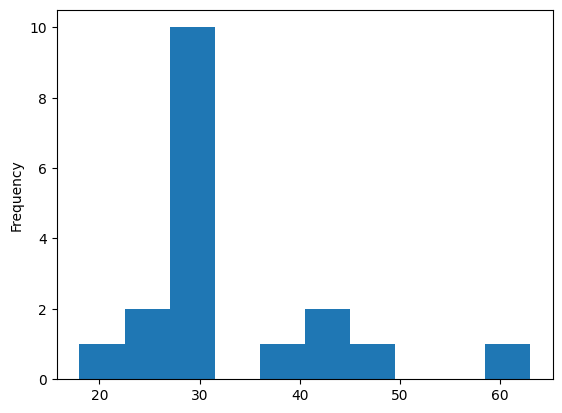

In [321]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age'].plot.hist(bins=10)

### 👩‍🦰 Age Imputation for 'Mrs.' Title (3rd Class)

- **SibSp = 0, Parch = 2**  
  - 6 passengers total, 2 with missing age values  
  - Based on presence of young children (e.g., age 9) and comparison with similar parent-child pairs  
  - One adult outlier identified → excluded from group statistics  
  - Imputed both null values with **mean age = 26.7**

- **SibSp = 0, Parch = 0**  
  - 5 passengers total, 3 with missing age values  
  - Found an age outlier (63) that skewed the mean (32.8)  
  - Switched to **median age = 28** as a more robust central estimate  
  - Imputed all 3 nulls with **28**


In [ ]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,Yasbeck,Mrs,Antoni,Selini Alexander
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs,Josef,Josefine Franchi
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,Hakkarainen,Mrs,Pekka Pietari,Elin Matilda Dolck
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S,Lobb,Mrs,William Arthur,Cordelia K Stanlick
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,Vander Planke,Mrs,Julius,Emelia Maria Vandemoortele
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,de Messemaeker,Mrs,Guillaume Joseph,Emma
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,Ahlin,Mrs,Johan,Johanna Persdotter Larsson
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,Robins,Mrs,Alexander A,Grace Charity Laury
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,O'Brien,Mrs,Thomas,"Johanna ""Hannah"" Godfrey"
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,Davison,Mrs,Thomas Henry,Mary E Finck


In [328]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,12.000000,12.000000,12.0,8.000000,12.0,12.0,12.000000
mean,328.416667,0.500000,3.0,29.625000,1.0,0.0,15.478125
std,271.764088,0.522233,0.0,10.992692,0.0,0.0,2.252801
min,19.000000,0.000000,3.0,15.000000,1.0,0.0,9.475000
25%,112.250000,0.000000,3.0,22.500000,1.0,0.0,14.489575
50%,267.500000,0.500000,3.0,28.500000,1.0,0.0,15.975000
75%,564.750000,1.000000,3.0,37.000000,1.0,0.0,16.425000
max,831.000000,1.000000,3.0,47.000000,1.0,0.0,18.000000


<Axes: ylabel='Frequency'>

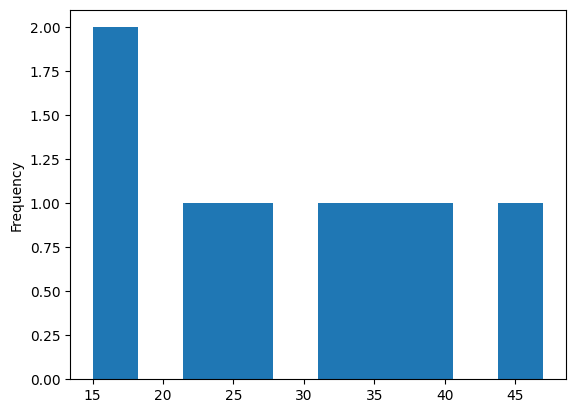

In [333]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),'Age'].plot.hist()

In [346]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,O'Brien,Mrs,Thomas,"Johanna ""Hannah"" Godfrey"
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,Davison,Mrs,Thomas Henry,Mary E Finck
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S,Thorneycroft,Mrs,Percival,Florence Kate White
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,Caram,Mrs,Joseph,Maria Elias


In [375]:
mean=(change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),'Age'].mean())
mean

np.float64(29.625)

In [376]:
median=(change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),'Age'].median())
median

np.float64(28.5)

In [377]:
impute=round((mean+median)/2)
impute

29

In [378]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==3)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=impute

In [382]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==3)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,12.000000,12.000000,12.0,12.000000,12.0,12.0,12.000000
mean,328.416667,0.500000,3.0,29.416667,1.0,0.0,15.478125
std,271.764088,0.522233,0.0,8.774533,0.0,0.0,2.252801
min,19.000000,0.000000,3.0,15.000000,1.0,0.0,9.475000
25%,112.250000,0.000000,3.0,25.500000,1.0,0.0,14.489575
50%,267.500000,0.500000,3.0,29.000000,1.0,0.0,15.975000
75%,564.750000,1.000000,3.0,32.250000,1.0,0.0,16.425000
max,831.000000,1.000000,3.0,47.000000,1.0,0.0,18.000000


### 👩 Age Imputation for 'Mrs.' Title (1 SibSp, 0 Parch – 3rd Class)

- **12 passengers** in total, with **4 null age values**
- No consistent pattern found after analyzing relationships (husbands/siblings) and fare
- Imputed all 4 missing values with **29**, a rounded average of group mean (29.6) and median (28.5)


In [407]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Age'].isnull()),'Pclass'].value_counts()

Pclass
3    33
2     2
1     1
Name: count, dtype: int64

In [405]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Age'].isnull()),'SibSp'].value_counts()

SibSp
0    23
1     6
8     3
3     3
2     1
Name: count, dtype: int64

In [411]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Miss,Elizabeth,NaN
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,Miss,Amelie,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune,Miss,Mabel Helen,NaN
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,Newsom,Miss,Helen Monypeny,NaN
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,Isham,Miss,Ann Elizabeth,NaN
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,Lurette,Miss,Elise,NaN
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,Newell,Miss,Madeleine,NaN
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,Bazzani,Miss,Albina,NaN
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,Cherry,Miss,Gladys,NaN
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward,Miss,Anna,NaN


In [ ]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,Fleming,Miss,Margaret,NaN


In [415]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,Maioni,Miss,Roberta,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith,NaN
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S,Longley,Miss,Gretchen Fiske,NaN
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,Cleaver,Miss,Alice,NaN
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,Hays,Miss,Margaret Bechstein,NaN
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,Barber,Miss,"Ellen ""Nellie""",NaN
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,Allen,Miss,Elisabeth Walton,NaN
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,Cherry,Miss,Gladys,NaN
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,Francatelli,Miss,Laura Mabel,NaN
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S,Perreault,Miss,Anne,NaN


In [417]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,25.000000,25.00,25.0,24.00000,25.0,25.0,25.000000
mean,416.320000,0.96,1.0,33.75000,0.0,0.0,123.570996
std,238.544671,0.20,0.0,10.89176,0.0,0.0,99.413838
min,12.000000,0.00,1.0,16.00000,0.0,0.0,26.550000
25%,259.000000,1.00,1.0,28.25000,0.0,0.0,77.958300
50%,326.000000,1.00,1.0,31.00000,0.0,0.0,93.500000
75%,610.000000,1.00,1.0,38.50000,0.0,0.0,146.520800
max,888.000000,1.00,1.0,58.00000,0.0,0.0,512.329200


<Axes: ylabel='Frequency'>

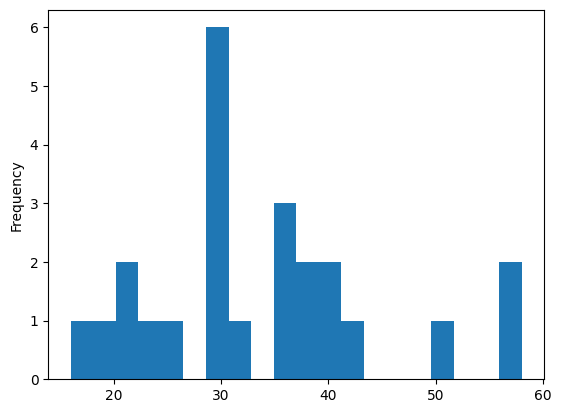

In [ ]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0),'Age'].plot.hist(bins=20)

In [425]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

np.float64(31.0)

In [427]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

In [429]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,25.000000,25.00,25.0,25.00000,25.0,25.0,25.000000
mean,416.320000,0.96,1.0,33.64000,0.0,0.0,123.570996
std,238.544671,0.20,0.0,10.67661,0.0,0.0,99.413838
min,12.000000,0.00,1.0,16.00000,0.0,0.0,26.550000
25%,259.000000,1.00,1.0,29.00000,0.0,0.0,77.958300
50%,326.000000,1.00,1.0,31.00000,0.0,0.0,93.500000
75%,610.000000,1.00,1.0,38.00000,0.0,0.0,146.520800
max,888.000000,1.00,1.0,58.00000,0.0,0.0,512.329200


`Miss` Title of `1st Class` (1 null age value): Imputed the median of the group (0-`SibSp` and 0-`Parch`)

In [432]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,Laroche,Miss,Simonne Marie Anne Andree,NaN
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S,Rugg,Miss,Emily,NaN
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,West,Miss,Constance Mirium,NaN
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,Ilett,Miss,Bertha,NaN
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S,Webber,Miss,Susan,NaN
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S,Yrois,Miss,Henriette,"""Mrs Harbeck"""
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,Cameron,Miss,Clear Annie,NaN
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S,Collyer,Miss,"Marjorie ""Lottie""",NaN
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,Keane,Miss,Nora A,NaN
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q,Slayter,Miss,Hilda Mary,NaN


In [445]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q,Keane,Miss,Nora A,NaN
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.00,NaN,S,Leitch,Miss,Jessie Wills,NaN


In [437]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.50,NaN,S,Ilett,Miss,Bertha,NaN
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.00,NaN,C,Lehmann,Miss,Bertha,NaN
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.00,NaN,S,Phillips,Miss,Kate Florence,"""Mrs Kate Louise Phillips Marshall"""
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.50,NaN,S,Rugg,Miss,Emily,NaN
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.00,NaN,S,Yrois,Miss,Henriette,"""Mrs Harbeck"""
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.00,F33,S,Brown,Miss,"Amelia ""Mildred""",NaN
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.50,E101,S,Troutt,Miss,"Edwina Celia ""Winnie""",NaN
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.00,NaN,S,Davis,Miss,Mary,NaN
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.00,NaN,S,Sinkkonen,Miss,Anna,NaN
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.35,NaN,Q,Slayter,Miss,Hilda Mary,NaN


<Axes: xlabel='Age', ylabel='Fare'>

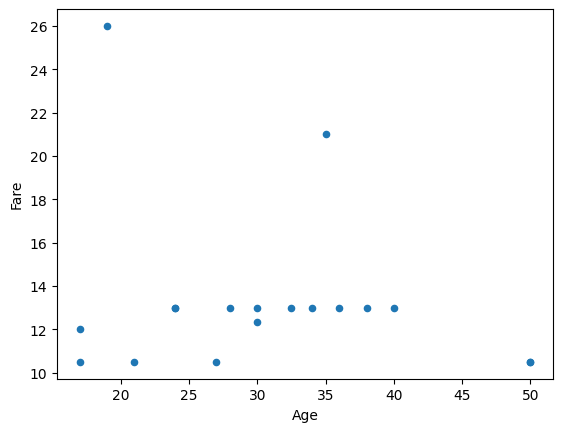

In [438]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].plot.scatter(x='Age',y='Fare')

<Axes: ylabel='Frequency'>

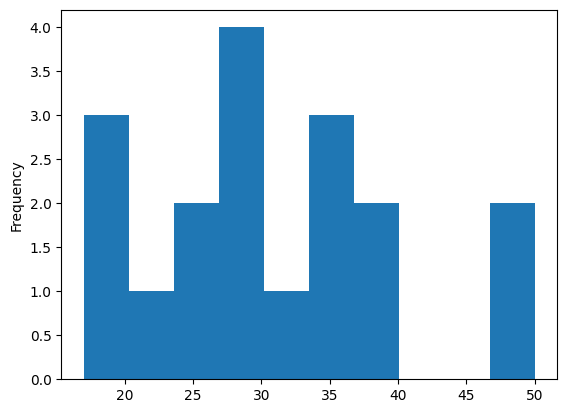

In [440]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0),'Age'].plot.hist()

In [441]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.000000,20.000000,20.0,18.000000,20.0,20.0,20.000000
mean,391.200000,0.900000,2.0,30.694444,0.0,0.0,14.310000
std,199.760277,0.307794,0.0,9.892271,0.0,0.0,5.766386
min,57.000000,0.000000,2.0,17.000000,0.0,0.0,10.500000
25%,281.000000,1.000000,2.0,24.000000,0.0,0.0,11.625000
50%,373.000000,1.000000,2.0,30.000000,0.0,0.0,13.000000
75%,539.500000,1.000000,2.0,35.750000,0.0,0.0,13.000000
max,748.000000,1.000000,2.0,50.000000,0.0,0.0,33.000000


In [444]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

np.float64(30.0)

In [447]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['Age'].isnull())&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

In [453]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.000000,20.000000,20.0,20.000000,20.0,20.0,20.000000
mean,391.200000,0.900000,2.0,30.625000,0.0,0.0,14.310000
std,199.760277,0.307794,0.0,9.359593,0.0,0.0,5.766386
min,57.000000,0.000000,2.0,17.000000,0.0,0.0,10.500000
25%,281.000000,1.000000,2.0,24.000000,0.0,0.0,11.625000
50%,373.000000,1.000000,2.0,30.000000,0.0,0.0,13.000000
75%,539.500000,1.000000,2.0,35.250000,0.0,0.0,13.000000
max,748.000000,1.000000,2.0,50.000000,0.0,0.0,33.000000


`Miss` Title of `2st Class` (2 null age value): Imputed the median of the group (0-`SibSp` and 0-`Parch`),i.e., 30.

## 🧹 Final Age Imputation Decisions

- **`Dr.` title (1 null):** Imputed with **40.6**, the mean age of male Dr. passengers.  
- **`Master` title in 3rd class (4 nulls):** Imputed with **5.3**, the mean age of Master passengers in 3rd class.

### 👩‍🦳 Age Imputation for 'Mrs.' Title (1st Class)

- **0 SibSp, 0 Parch**  
  - 1 missing age imputed as **57**  
  - Based on group mean (51.3), max age (62), and similar fare (79.2), suggesting an older, wealthy widow.

- **0 SibSp, 1 Parch**  
  - 1 missing age imputed as **50**  
  - Based on group mean (50.2) and presence of a daughter aged 22, estimating maternal age.

- **1 SibSp, 0 Parch** (23 passengers, 6 nulls)  
  - 4 passengers accompanied by husbands → imputed as **Husband Age - 6**  
    - Resulting ages: `22, 42, 44, 43`  
  - 2 remaining passengers (likely with siblings) → imputed with **group’s updated mean age** = **36**

### 👩‍🍼 Age Imputation for 'Mrs.' Title (3rd Class)

- **0 SibSp, 2 Parch**  
  - 6 passengers total, 2 with missing age values  
  - Observed child age (e.g., 9) and pattern with similar parent-child pairs  
  - One adult outlier excluded  
  - Imputed both nulls with **mean = 26.7**

- **0 SibSp, 0 Parch**  
  - 5 passengers total, 3 with missing age values  
  - Found outlier (age 63) skewing group mean (32.8)  
  - Used **median = 28** as a more robust estimate  
  - Imputed all 3 nulls with **28**
### 👩 Age Imputation for 'Mrs.' Title (1 SibSp, 0 Parch – 3rd Class)

- **12 passengers** in total, with **4 null age values**
- No consistent pattern found after analyzing relationships (husbands/siblings) and fare
- Imputed all 4 missing values with **29**, a rounded average of group mean (29.6) and median (28.5)
### 🧒 Age Imputation for 'Miss' Title (1st Class | 0 SibSp, 0 Parch)

- **1 null age value**
- No clear relational or fare-based pattern found
- Imputed with **group median age** i.e., 31
### 👧 Age Imputation for `Miss` Title – 2nd Class

- **Group**: `Miss` passengers in **2nd Class** with `0 SibSp` and `0 Parch`  
  - Total passengers: **20**  
  - Null Age values: **2**

- **Imputation Strategy**:  
  - No observable correlation with Fare or other features  
  - Imputed using the **group's median age** = **30**

